#### Load data

In [2]:
%pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sadmansakibmahi/fake-news-detection-dataset-with-pre-trained-model")

print("Path to dataset files:", path)

Note: you may need to restart the kernel to use updated packages.


100%|██████████| 642M/642M [00:14<00:00, 47.0MB/s] 

Extracting files...


Path to dataset files: /home/jovyan/.cache/kagglehub/datasets/sadmansakibmahi/fake-news-detection-dataset-with-pre-trained-model/versions/22


In [3]:
import pandas as pd
import numpy as np

In [5]:
train_set = pd.read_csv('Training.csv')
train_set.head()

,Text,label
0,WASHINGTON (Reuters) - The head of a conservat...,Real
1,WASHINGTON (Reuters) - Transgender people will...,Real
2,WASHINGTON (Reuters) - The special counsel inv...,Real
3,WASHINGTON (Reuters) - Trump campaign adviser ...,Real
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,Real


In [6]:
test_set = pd.read_csv('test.csv')
test_set.head()

,Text,label
0,"((In March 30 item, corrects spelling of Kisl...",Real
1,((Refiles December 15 story to clarify areas ...,Real
2,((This Dec. 5 story corrects year in 2nd para...,Real
3,((This Dec. 9 story corrects year in 2nd para...,Real
4,((This December 4 story has been corrected to...,Real


In [7]:
train_set['Text'][0]

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

##### Check the data balance

In [8]:
print(f"Total number of articles: {train_set.shape[0]}")

label_counts = train_set['label'].value_counts(normalize=True) * 100
print(f"Fake News: {label_counts['Fake']:.2f}%")
print(f"Real News: {label_counts['Real']:.2f}%")

Total number of articles: 83539
Fake News: 49.00%
Real News: 51.00%


In [19]:
print(f"Total number of articles: {test_set.shape[0]}")

label_counts = test_set['label'].value_counts(normalize=True) * 100
print(f"Fake News: {label_counts['Fake']:.2f}%")
print(f"Real News: {label_counts['Real']:.2f}%")

Total number of articles: 38654
Fake News: 45.18%
Real News: 54.82%


In [14]:
print(train_set.shape)

(83539, 3)


In [15]:
print(test_set.shape)

(38654, 2)


In [17]:
train_size = train_set.shape[0]
test_size = test_set.shape[0]
total_size = train_size + test_size

train_proportion = (train_size / total_size) * 100
test_proportion = (test_size / total_size) * 100

print(f"Training Set: {train_size} samples ({train_proportion:.2f}%)")
print(f"Test Set: {test_size} samples ({test_proportion:.2f}%)")

Training Set: 83539 samples (68.37%)
Test Set: 38654 samples (31.63%)


##### Statistical summary

In [9]:
train_set['text_length'] = train_set['Text'].apply(lambda x: len(str(x).split()))

text_stats = train_set['text_length'].describe()
print(f"Mean text length: {text_stats['mean']:.2f} words")
print(f"Median text length: {text_stats['50%']:.2f} words")
print(f"Standard Deviation: {text_stats['std']:.2f}")
print(f"Min length: {text_stats['min']} words")
print(f"Max length: {text_stats['max']} words")

Mean text length: 401.65 words
Median text length: 365.00 words
Standard Deviation: 311.62
Min length: 0.0 words
Max length: 5412.0 words


##### Text length distribution

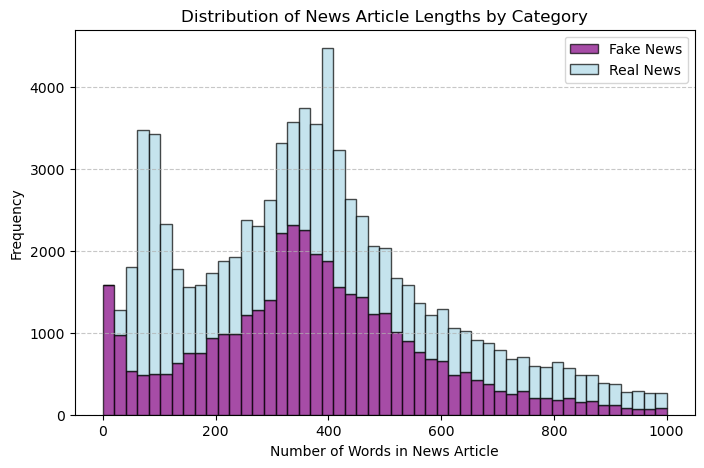

In [18]:
import matplotlib.pyplot as plt
import numpy as np

train_set['text_length'] = train_set['Text'].apply(lambda x: len(str(x).split()))

fake_text_length = train_set[train_set['label'] == 'Fake']['text_length']
real_text_length = train_set[train_set['label'] == 'Real']['text_length']

bins = np.linspace(0, 1000, 50) 

plt.figure(figsize=(8, 5))
plt.hist([fake_text_length, real_text_length], bins=bins, stacked=True, label=['Fake News', 'Real News'], color=['purple', 'lightblue'], alpha=0.7, edgecolor='black')

plt.xlabel("Number of Words in News Article")
plt.ylabel("Frequency")
plt.title("Distribution of News Article Lengths by Category")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

##### Word cloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.6/27.6 MB 23.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.4-cp312-cp312-linux_aarch64.whl size=176890 sha256=3084afb1ac6f63060e148a868b2d86d1b427e89f5a55ce5e3e6e831fe276c592
  Stored in directory: /home/jovyan/.cache/pip/wheels/93/2a/62/2b71344178dc0164dcf96a0449d00886229f8e050ffa76a010
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


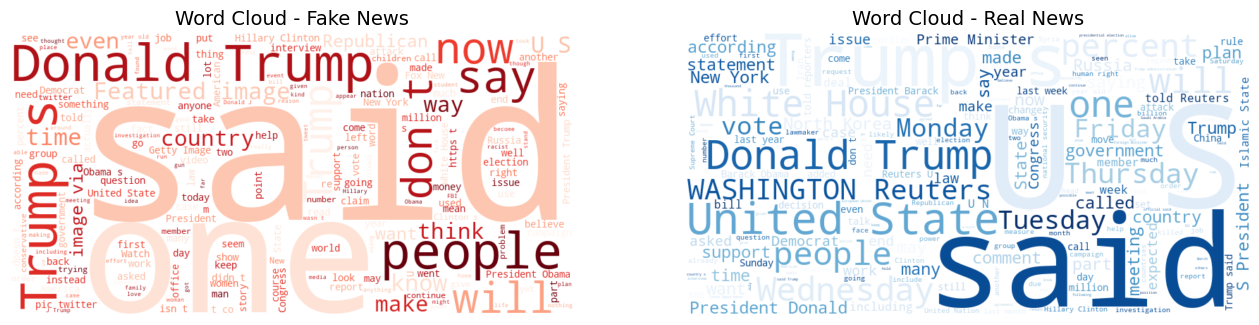

In [12]:
%pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fake_text = " ".join(train_set[train_set['label'] == 'Fake']['Text'].dropna())
real_text = " ".join(train_set[train_set['label'] == 'Real']['Text'].dropna())

fake_wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(fake_text)
real_wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Blues").generate(real_text)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].imshow(fake_wordcloud, interpolation="bilinear")
ax[0].set_title("Word Cloud - Fake News", fontsize=14)
ax[0].axis("off")

ax[1].imshow(real_wordcloud, interpolation="bilinear")
ax[1].set_title("Word Cloud - Real News", fontsize=14)
ax[1].axis("off")

plt.show()